In [1]:
from gridworld import GridWorld

env = GridWorld()
V = {} 
for state in env.states():
    V[state] = 0

state = (1,2)
print(V[state])
print(V)

0
{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0, (2, 3): 0}


In [2]:
from collections import defaultdict
from gridworld import GridWorld

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})

state = (0, 1)
print(pi[state])
print(pi)

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
defaultdict(<function <lambda> at 0x0000029C17474940>, {(0, 1): {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}})


defaultdict(<function <lambda> at 0x0000029C17474940>, {})


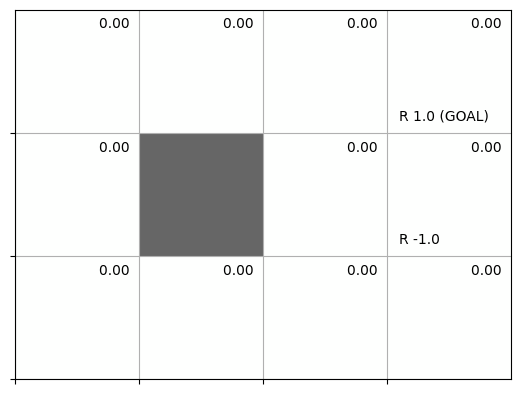

defaultdict(<function <lambda> at 0x0000029C17474940>, {(0, 0): 0.0, (1, 0): 0.0, (0, 1): 0.0, (0, 2): 0.25, (1, 2): -0.19375, (0, 3): 0, (2, 0): 0.0, (2, 1): 0.0, (1, 1): 0.0, (2, 2): -0.04359375, (1, 3): -0.04359374999999999, (2, 3): -0.26961718749999997})


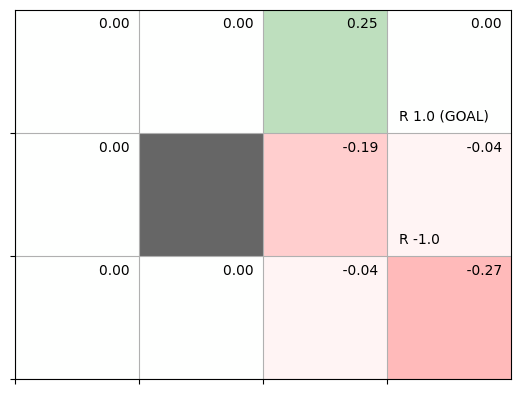

defaultdict(<function <lambda> at 0x0000029C17474940>, {(0, 0): 0.0, (1, 0): 0.0, (0, 1): 0.05625, (0, 2): 0.2753125, (1, 2): -0.251265625, (0, 3): 0, (2, 0): 0.0, (2, 1): -0.00980859375, (1, 1): -0.0309375, (2, 2): -0.12921416015624998, (1, 3): -0.12700722656249996, (2, 3): -0.42897754638671876})


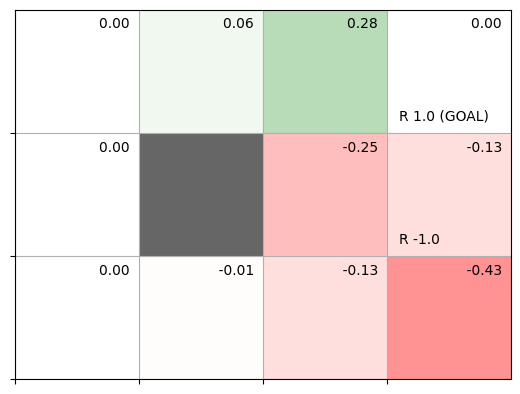

In [3]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_probs = pi[state]
        # print(action_probs)
        # print(state)
        new_V = 0
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)

            new_V += action_prob * (r + gamma * V[next_state])
        V[state] = new_V
    return V

from collections import defaultdict
from gridworld import GridWorld

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25, })
V = defaultdict(lambda: 0)
env = GridWorld()


print(V)
env.render_v(V)
eval_onestep(pi, V, env)
print(V)
env.render_v(V)
eval_onestep(pi, V, env)
print(V)
env.render_v(V)


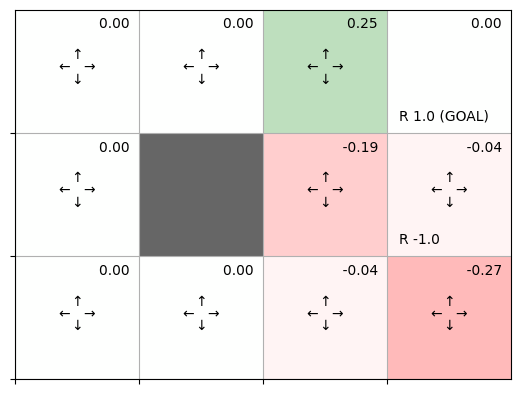

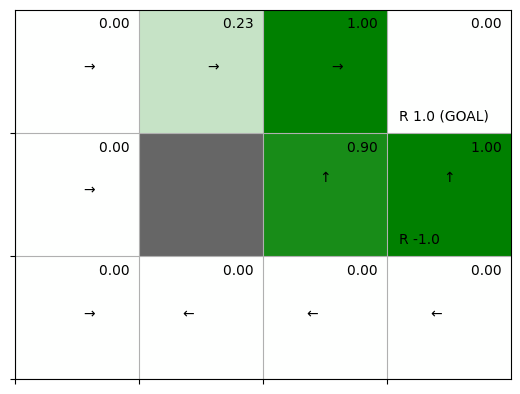

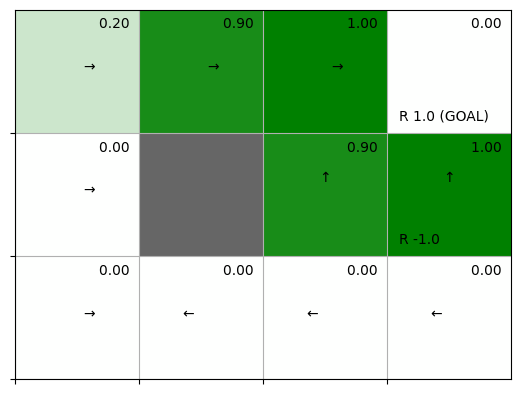

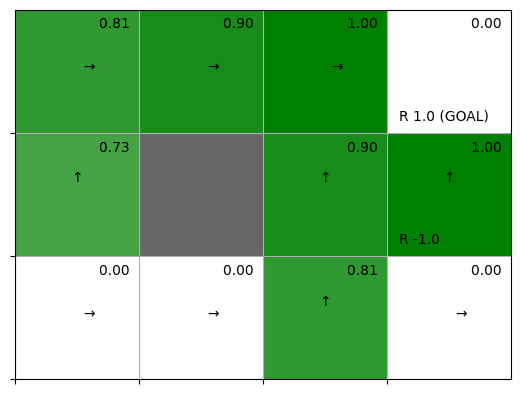

In [4]:
# def argmax(d):
#     max_value = max(d.values())
#     max_key = 0
#     for key, value in d.items():
#         if value == max_value:
#             max_key = key
#         return max_key

def argmax(action_values):
    max_value = float('-inf')
    max_key = None
    
    for key, value in action_values.items():
        if value >= max_value:
            max_value = value
            max_key = key
    
    return max_key


def greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions(): # [0,1,2,3] 移動する方向
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values[action] = value
            
            max_action = argmax(action_values)
            action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
            action_probs[max_action] = 1
            pi[state] = action_probs

    return pi

def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_probs = pi[state]
        # print(action_probs)
        # print(state)
        new_V = 0
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)

            new_V += action_prob * (r + gamma * V[next_state])
        V[state] = new_V
    return V

from collections import defaultdict
from gridworld import GridWorld

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25, })
V = defaultdict(lambda: 0)
env = GridWorld()
theshold=0.001
gamma = 0.9

# print(pi)
V = eval_onestep(pi, V, env)
# print(V)
# print(pi)
print()
env.render_v(V, pi)
pi = greedy_policy(V, env, gamma)
# print(pi)
# env.render_v(V)
V = eval_onestep(pi, V, env)
# print(V)
# print(pi)
env.render_v(V, pi)
V = eval_onestep(pi, V, env)
# print(V)
# print(pi)
env.render_v(V, pi)
pi = greedy_policy(V, env, gamma)
# print(pi)
# env.render_v(V)
V = eval_onestep(pi, V, env)
# print(V)
# print(pi)
env.render_v(V, pi)

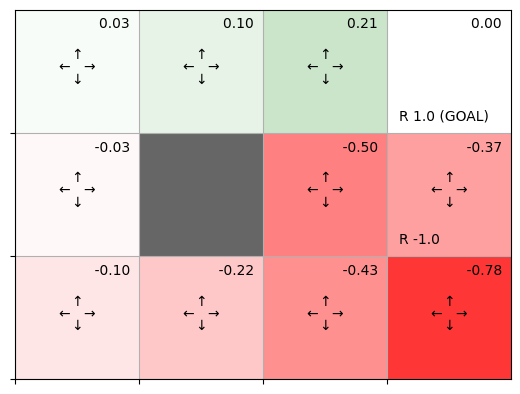

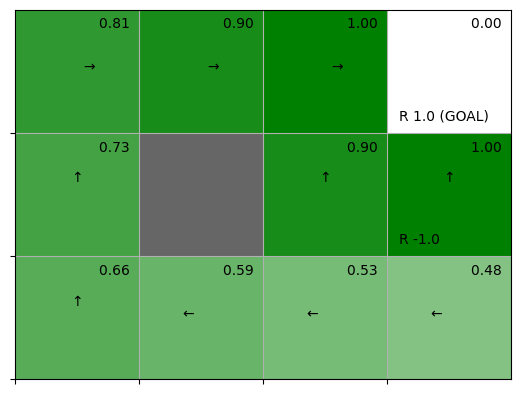

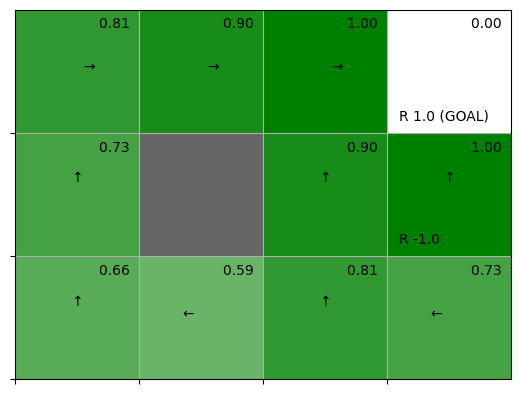

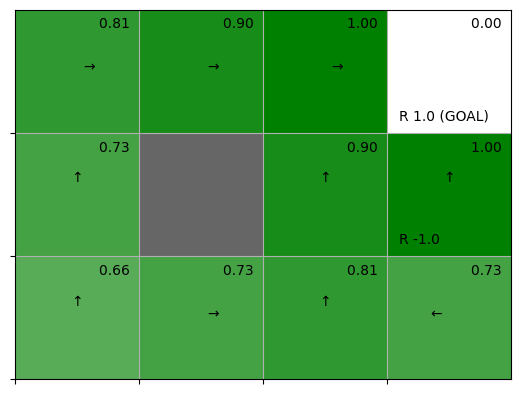

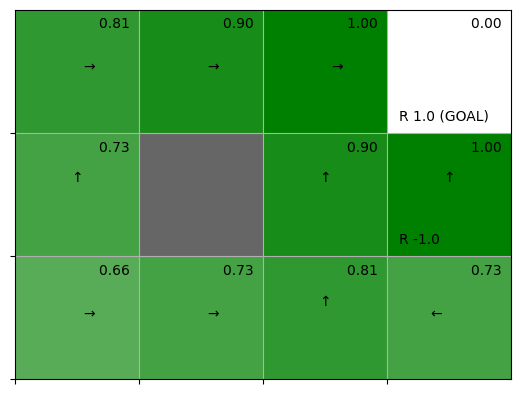

{(0, 0): {0: 0, 1: 0, 2: 0, 3: 1.0}, (0, 1): {0: 0, 1: 0, 2: 0, 3: 1.0}, (0, 2): {0: 0, 1: 0, 2: 0, 3: 1.0}, (0, 3): {0: 0, 1: 0, 2: 0, 3: 1.0}, (1, 0): {0: 1.0, 1: 0, 2: 0, 3: 0}, (1, 1): {0: 0, 1: 0, 2: 0, 3: 1.0}, (1, 2): {0: 1.0, 1: 0, 2: 0, 3: 0}, (1, 3): {0: 1.0, 1: 0, 2: 0, 3: 0}, (2, 0): {0: 0, 1: 0, 2: 0, 3: 1.0}, (2, 1): {0: 0, 1: 0, 2: 0, 3: 1.0}, (2, 2): {0: 1.0, 1: 0, 2: 0, 3: 0}, (2, 3): {0: 0, 1: 0, 2: 1.0, 3: 0}}


In [5]:
from policy_iter import policy_iter

env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)
print(pi)

In [27]:
from gridworld import GridWorld

env = GridWorld()

v= {}

# for state in env.states():
#     V[state] = 0
state = (1,2)
print(v[state])

KeyError: (1, 2)

In [28]:




def test_greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            
            
            action_values[action] = value
            print(f'state {state}, action {action}, av {action_values}')
            max_action = argmax(action_values)
            action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
            action_probs[max_action] = 10
            pi[state] = action_probs

    return pi

from collections import defaultdict

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25, })
V = defaultdict(lambda: 0)
theshold=0.001
gamma = 0.9

env = GridWorld()

print(test_greedy_policy(V, env, gamma))

state (0, 0), action 0, av {0: 0.0}
state (0, 0), action 1, av {0: 0.0, 1: 0.0}
state (0, 0), action 2, av {0: 0.0, 1: 0.0, 2: 0.0}
state (0, 0), action 3, av {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
state (0, 1), action 0, av {0: 0.0}
state (0, 1), action 1, av {0: 0.0, 1: 0.0}
state (0, 1), action 2, av {0: 0.0, 1: 0.0, 2: 0.0}
state (0, 1), action 3, av {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
state (0, 2), action 0, av {0: 0.0}
state (0, 2), action 1, av {0: 0.0, 1: 0.0}
state (0, 2), action 2, av {0: 0.0, 1: 0.0, 2: 0.0}
state (0, 2), action 3, av {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}
state (0, 3), action 0, av {0: 1.0}
state (0, 3), action 1, av {0: 1.0, 1: -1.0}
state (0, 3), action 2, av {0: 1.0, 1: -1.0, 2: 0.0}
state (0, 3), action 3, av {0: 1.0, 1: -1.0, 2: 0.0, 3: 1.0}
state (1, 0), action 0, av {0: 0.0}
state (1, 0), action 1, av {0: 0.0, 1: 0.0}
state (1, 0), action 2, av {0: 0.0, 1: 0.0, 2: 0.0}
state (1, 0), action 3, av {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
state (1, 1), action 0, av {0: 0.0}
s

In [18]:
import numpy as np

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25, })

action_probs = pi[(0,0)]
actions = list(action_probs.keys())
print(actions)
probs = list(action_probs.values())
print(probs)
np.random.choice(actions, p = probs)


[0, 1, 2, 3]
[0.25, 0.25, 0.25, 0.25]


3